In [1]:
from components.environment import create_environment
from components.model import ActorCriticMLP
from components.helper import compute_returns
import torch
import tqdm
import yaml
import matplotlib.pyplot as plt
import numpy as np
from components.encoder import RuleBasedEncoder
import cv2

In [2]:
# Load configuration
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

env = create_environment(
    game_name=config["environment"]["game_name"],
    render_mode="rgb_array",
    num_envs=1
    )
        
model = ActorCriticMLP(n_input=50,
                    num_actions=env.action_space.n).to(device)

optimizer = torch.optim.AdamW(model.parameters(),
                            lr=config["optimizer"]["params"]["lr"],
                            weight_decay=config["optimizer"]["params"]["weight_decay"]
                            )

encoder = RuleBasedEncoder()

max_updates = config["training"]["max_updates"]
steps_per_update = config["training"]["steps_per_update"]
gamma = config["training"]["gamma"]
actor_weight = config["training"]["actor_weight"]
critic_weight = config["training"]["critic_weight"]
entropy_weight = config["training"]["entropy_weight"]

state, _ = env.reset()
print("Initial state shape:", state.shape)
#state = torch.tensor(state, dtype=torch.float32).to(device)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


Initial state shape: (210, 160, 3)


In [6]:
n =1

for _ in range(n):
    state, _, _, _, _ = env.step(1)

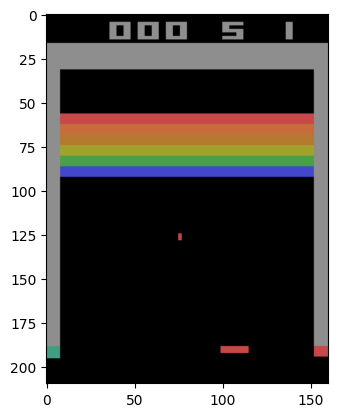

In [7]:
plt.imshow(state)

In [8]:
output = encoder([state])[0]

print("Player position:", output[0])
print("Ball position:", output[1:3])
print("Ball velocity:", output[3:5])

# Print the bricks position, unflatten the output knowing that the bricks are 6 x 18 and display it as a matrix
bricks = np.array(output[5:])
bricks = bricks.reshape(6, 18)  # Use reshape instead of view
print("Bricks position:")
print(bricks)

Player position: 0.26388888888888884
Ball position: [-0.06944444  0.05027933]
Ball velocity: [0. 0.]
Bricks position:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [45]:
print(state[31:, 8:-8].shape)


(179, 144, 3)
